In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels1 = [
    0.2,
    0.3,
    0.4,
]
labels2 = [0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 1, 1.1]
labels3 = [
    1.2,
    1.3,
    1.4,
    1.5,
]
labels4 = [1.6, 1.7, 1.8, 1.9]
labels5 = [
    2,
    2.1,
    2.2,
    2.3,
]
labels6 = [2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]


df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
masses1 = []
masses2 = []
masses3 = []
masses4 = []
masses5 = []
masses6 = []
for label in labels1:
    masses1 += [label]
    df1 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels2:
    masses2 += [label]
    df2 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels3:
    masses3 += [label]
    df3 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels4:
    masses4 += [label]
    df4 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels5:
    masses5 += [label]
    df5 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels6:
    masses6 += [label]
    df6 += [pd.read_csv(f"{label}.data", sep="\s+")]

In [31]:
pred=0.78

df=[]
masses = []

if 0 < pred <= 0.4:
    df = df1
    masses=masses1
    labels=labels1
elif 0.4 < pred <= 1.1:
    df = df2
    masses=masses2
    labels=labels2
elif 1.1 < pred <= 1.5:
    df = df3
    masses=masses3
    labels=labels3
elif 1.5 < pred <= 1.9:
    df = df4
    masses=masses4
    labels=labels4

elif 1.9 < pred <= 2.3:
    df = df5
    masses=masses5
    labels=labels5

elif 2.3 < pred <= 3:
    df = df6
    masses=masses6
    labels=labels6



ages = []
lums = []
ages1 = []
lums1 = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]
min_length = min(len(lum) for lum in lums)
ages = np.log10([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])
print(ages.shape)
print(lums.shape)


(8, 1090)
(8, 1090)


In [32]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)
print(ages.shape)
print(lums.shape)


(8, 2180)
(8, 1090)
(8, 1090)


(1, 2180)
(1, 2180)
(8, 1090)
(8, 1090)
[0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 1, 1.1]


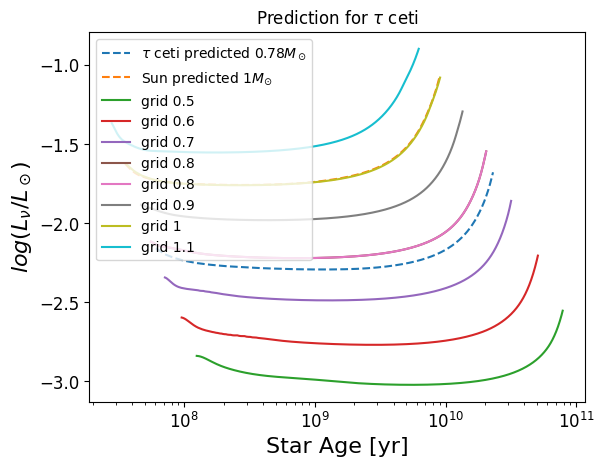

In [33]:

prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10**predicted_ages[0], predicted_lums[0],linestyle='--' ,label=fr"$\tau$ ceti predicted ${pred}M_\odot$")

prediction = model.predict([[1]])
predicted_agess = prediction[:, ::2]
predicted_lumss = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10**predicted_agess[0], predicted_lumss[0].T,linestyle='--' ,label=r"Sun predicted $1M_{\odot}$")
print(ages.shape)
print(lums.shape)

print(labels)
for i, label in [*enumerate(labels)]: #[4:]:
    plt.plot(10**ages[i], lums[i], label=f"grid {label}")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$log(L_\nu/L_\odot)$',fontsize=16)
plt.xlabel('Star Age [yr]',fontsize=16)
plt.legend(fontsize=10)
plt.title(r'Prediction for $\tau$ ceti')
plt.xscale('log')

Text(0.5, 1.0, 'Predicted flux of $\\tau$ ceti')

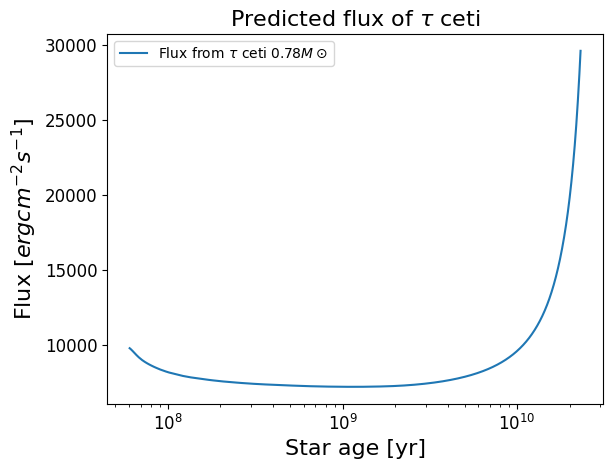

In [ ]:
def flux(l,r):
    return l/(4*np.pi*(r**2))

lumt=(10**predicted_lums[0])*3.828e33
lums=(10**predicted_lumss[0])*3.828e33
flt=flux(lumt,3.65*3.086e18)
fls=flux(lums,14.712e12)

plt.plot(10**predicted_ages[0],flt, label=r'Flux from $\tau$ ceti $0.78M\odot$')
plt.xscale('log')
plt.ylabel(r'Flux [$erg cm^{-2} s^{-1} $]',fontsize=16)
plt.xlabel('Star age [yr]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.title(r"Predicted flux of $\tau$ ceti", fontsize=16 )

Text(0.5, 1.0, 'Predicted flux of the Sun')

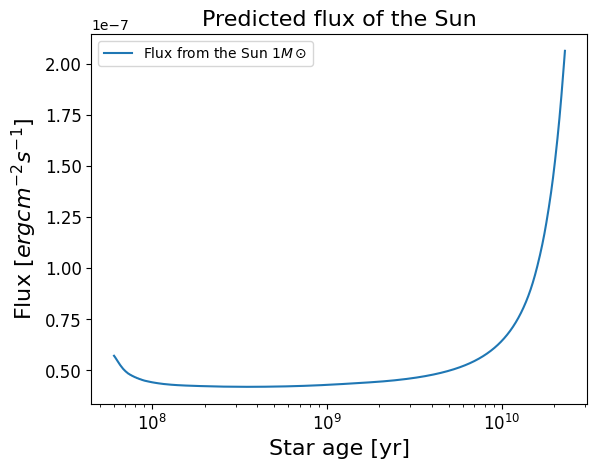

In [35]:
plt.plot(10**predicted_ages[0],fls, label=r'Flux from the Sun $1M\odot$')
plt.xscale('log')
plt.ylabel(r'Flux [$erg cm^{-2} s^{-1} $]',fontsize=16)
plt.xlabel('Star age [yr]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.title(r"Predicted flux of the Sun", fontsize=16 )

(4, 3686)
(1, 3686)


Text(0.5, 1.0, 'Prediction for Sirius')

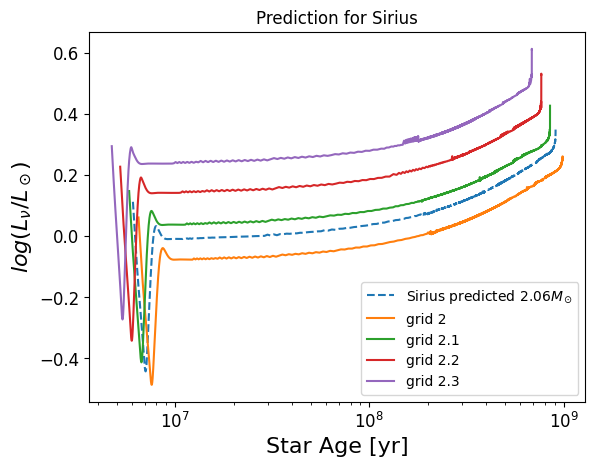

In [36]:
pred=2.06

df=[]
masses = []

if 0 < pred <= 0.4:
    df = df1
    masses=masses1
    labels=labels1
elif 0.4 < pred <= 1.1:
    df = df2
    masses=masses2
    labels=labels2
elif 1.1 < pred <= 1.5:
    df = df3
    masses=masses3
    labels=labels3
elif 1.5 < pred <= 1.9:
    df = df4
    masses=masses4
    labels=labels4
elif 1.9 < pred <= 2.3:
    df = df5
    masses=masses5
    labels=labels5
elif 2.3 < pred <= 3:
    df = df6
    masses=masses6
    labels=labels6

ages = []
lums = []
ages1 = []
lums1 = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]
min_length = min(len(lum) for lum in lums)
ages = np.log10([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)

prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10**predicted_ages[0], predicted_lums[0],linestyle='--' ,label=fr"Sirius predicted ${pred}M_\odot$")

for i, label in [*enumerate(labels)]: #[4:]:
    plt.plot(10**ages[i], lums[i], label=f"grid {label}")
plt.xticks(fontsize=12);plt.yticks(fontsize=12);plt.ylabel(r'$log(L_\nu/L_\odot)$',fontsize=16);plt.xlabel('Star Age [yr]',fontsize=16);plt.legend(fontsize=10);plt.xscale('log')
plt.title(r'Prediction for Sirius')



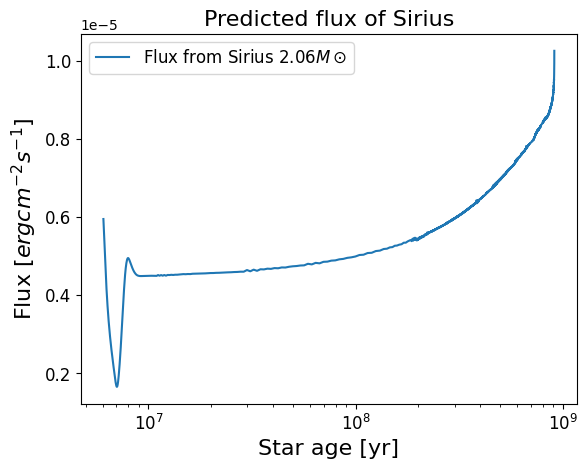

In [37]:
lumt=(10**predicted_lums[0])*3.828e33
flt=flux(lumt,8.1462e18)

plt.plot(10**predicted_ages[0],flt, label=r'Flux from Sirius $2.06M\odot$')
plt.title(r"Predicted flux of Sirius", fontsize=16 )
plt.ylabel(r'Flux [$ergcm^{-2} s^{-1} $]',fontsize=16);plt.xlabel('Star age [yr]',fontsize=16);plt.xticks(fontsize=12);plt.yticks(fontsize=12);plt.legend(fontsize=12);plt.xscale('log')